In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Podaj ścieżkę do pliku CSV
file_path = "ela_gray.csv"

# Wczytaj plik CSV do DataFrame
df = pd.read_csv(file_path)

# Wyświetl pierwsze 5 wierszy DataFrame
df.head()

,AUC,Precision,Recall,TN,TP,accuracy,loss,val_AUC,val_Precision,val_Recall,val_TN,val_TP,val_accuracy,val_loss
0,0.503852,0.282609,0.003763,4963.0,13.0,0.588806,0.680852,0.537422,0.0,0.0,2495.0,0.0,0.599327,0.677562
1,0.499049,0.000000,0.000000,4996.0,0.0,0.591173,0.677769,0.500000,0.0,0.0,2495.0,0.0,0.599327,0.676073
2,0.507699,0.000000,0.000000,4996.0,0.0,0.591173,0.677300,0.500000,0.0,0.0,2495.0,0.0,0.599327,0.673676
3,0.504061,0.000000,0.000000,4996.0,0.0,0.591173,0.677792,0.500000,0.0,0.0,2495.0,0.0,0.599327,0.674361
4,0.497875,0.000000,0.000000,4996.0,0.0,0.591173,0.677708,0.500000,0.0,0.0,2495.0,0.0,0.599327,0.674973


In [10]:
max_values = df.max()
max_values

AUC                 0.507699
Precision           0.282609
Recall              0.003763
TN               4996.000000
TP                 13.000000
accuracy            0.591173
loss                0.680852
val_AUC             0.537422
val_Precision       0.000000
val_Recall          0.000000
val_TN           2495.000000
val_TP              0.000000
val_accuracy        0.599327
val_loss            0.677562
dtype: float64

In [11]:
min = df['val_loss'].idxmin()
df.loc[min]

AUC                 0.499722
Precision           0.000000
Recall              0.000000
TN               4996.000000
TP                  0.000000
accuracy            0.591173
loss                0.676793
val_AUC             0.500000
val_Precision       0.000000
val_Recall          0.000000
val_TN           2495.000000
val_TP              0.000000
val_accuracy        0.599327
val_loss            0.673320
Name: 10, dtype: float64

In [12]:
df.columns = [
    'auc_trening', 'Precyzja Trening', 'Czułość Trening',
    'tn_trening', 'tp_trening', 'Dokładność Trening', 'Strata Trening',
    'auc_test', 'Precyzja Test', 'Czułość Test',
    'tn_test', 'tp_test', 'Dokładność Test', 'Strata Test'
]
df.head()

,auc_trening,Precyzja Trening,Czułość Trening,tn_trening,tp_trening,Dokładność Trening,Strata Trening,auc_test,Precyzja Test,Czułość Test,tn_test,tp_test,Dokładność Test,Strata Test
0,0.503852,0.282609,0.003763,4963.0,13.0,0.588806,0.680852,0.537422,0.0,0.0,2495.0,0.0,0.599327,0.677562
1,0.499049,0.000000,0.000000,4996.0,0.0,0.591173,0.677769,0.500000,0.0,0.0,2495.0,0.0,0.599327,0.676073
2,0.507699,0.000000,0.000000,4996.0,0.0,0.591173,0.677300,0.500000,0.0,0.0,2495.0,0.0,0.599327,0.673676
3,0.504061,0.000000,0.000000,4996.0,0.0,0.591173,0.677792,0.500000,0.0,0.0,2495.0,0.0,0.599327,0.674361
4,0.497875,0.000000,0.000000,4996.0,0.0,0.591173,0.677708,0.500000,0.0,0.0,2495.0,0.0,0.599327,0.674973


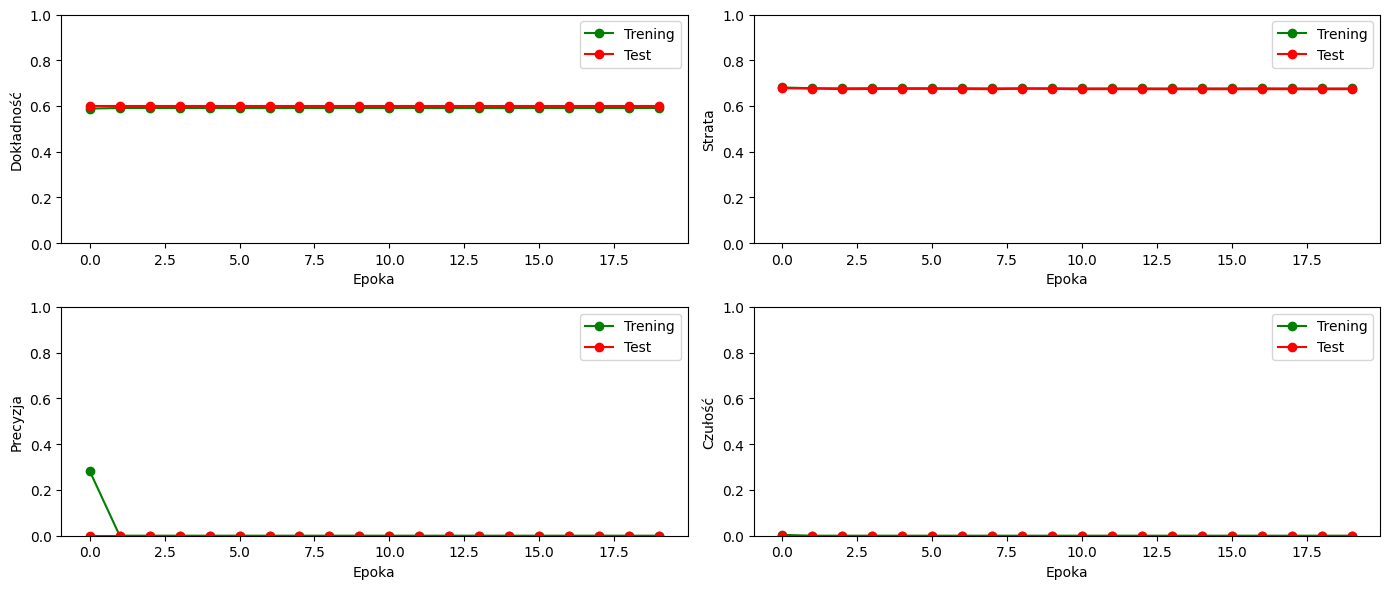

Training history with confidence intervals saved as training_ela_gray.svg


In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Wykres dla Dokładności
axes[0, 0].plot(df['Dokładność Trening'], label='Trening', color='green', marker='o')
axes[0, 0].plot(df['Dokładność Test'], label='Test', color='red', marker='o')
axes[0, 0].set_xlabel('Epoka')
axes[0, 0].set_ylabel('Dokładność')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].legend()

# Wykres dla Straty
axes[0, 1].plot(df['Strata Trening'], label='Trening', color='green', marker='o')
axes[0, 1].plot(df['Strata Test'], label='Test', color='red', marker='o')
axes[0, 1].set_xlabel('Epoka')
axes[0, 1].set_ylabel('Strata')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend()

# Wykres dla Precyzji
axes[1, 0].plot(df['Precyzja Trening'], label='Trening', color='green', marker='o')
axes[1, 0].plot(df['Precyzja Test'], label='Test', color='red', marker='o')
axes[1, 0].set_xlabel('Epoka')
axes[1, 0].set_ylabel('Precyzja')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].legend()

# Wykres dla Czułości
axes[1, 1].plot(df['Czułość Trening'], label='Trening', color='green', marker='o')
axes[1, 1].plot(df['Czułość Test'], label='Test', color='red', marker='o')
axes[1, 1].set_xlabel('Epoka')
axes[1, 1].set_ylabel('Czułość')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].legend()

# Zapis do pliku SVG

plt.tight_layout()
plt.savefig('training_ela_gray.svg', format='svg')
plt.show()

print("Training history with confidence intervals saved as training_ela_gray.svg")
